## Project Description : House Price Prediciton 

## Import Libraries

In [1]:
## for loading and preprocessing 
import pandas as pd
import numpy as np 

## for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## splitting dataset
from sklearn.model_selection import train_test_split

## load regression model 
from sklearn.linear_model import LinearRegression

## evaluation metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

## Loading Data & Creating Copy

In [2]:
## read dataset
data = pd.read_csv("datasets/Housing.csv")

In [3]:
## create a deep copy 
df = data.copy()

## Data Preview And Understanding
- Loading the dataset

In [4]:
## view the first rows 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
## view the last five rows 
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
## check the number of rows and columns 
print(f'Total number of rows: {df.shape[0]} -> Total number of columns: {df.shape[1]}')

Total number of rows: 545 -> Total number of columns: 13


In [7]:
## get a summary description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
## checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
## checking for duplicated values 
df.duplicated().sum()

0

In [10]:
## checking type on columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
## finding unique instances in each column 
print(np.unique(df['price']))


[ 1750000  1767150  1820000  1855000  1890000  1960000  2100000  2135000
  2233000  2240000  2275000  2310000  2345000  2380000  2408000  2450000
  2485000  2520000  2590000  2604000  2653000  2660000  2695000  2730000
  2800000  2835000  2852500  2870000  2940000  2961000  2975000  3003000
  3010000  3045000  3080000  3087000  3115000  3118850  3129000  3143000
  3150000  3220000  3234000  3255000  3290000  3325000  3332000  3353000
  3360000  3395000  3423000  3430000  3465000  3493000  3500000  3535000
  3570000  3605000  3633000  3640000  3675000  3703000  3710000  3745000
  3773000  3780000  3815000  3836000  3850000  3885000  3920000  3990000
  4007500  4025000  4060000  4095000  4098500  4123000  4130000  4165000
  4193000  4200000  4235000  4270000  4277000  4305000  4319000  4340000
  4375000  4382000  4403000  4410000  4445000  4473000  4480000  4515000
  4543000  4550000  4585000  4613000  4620000  4655000  4690000  4753000
  4760000  4767000  4795000  4830000  4865000  4893

In [12]:
## finding unique instances in each column 
print(np.unique(df['area']))

[ 1650  1700  1836  1905  1950  2000  2015  2135  2145  2160  2175  2176
  2275  2325  2398  2400  2430  2475  2500  2520  2550  2610  2640  2650
  2684  2700  2747  2787  2800  2817  2835  2850  2856  2870  2880  2910
  2953  2970  2990  3000  3036  3040  3060  3069  3090  3100  3120  3150
  3162  3180  3185  3210  3240  3264  3290  3300  3350  3360  3400  3410
  3420  3450  3460  3480  3500  3510  3512  3520  3540  3570  3584  3600
  3620  3630  3635  3640  3649  3650  3660  3680  3700  3720  3745  3750
  3760  3780  3792  3800  3816  3840  3850  3880  3900  3930  3934  3960
  3968  3970  3986  3990  4000  4032  4040  4046  4050  4075  4079  4080
  4095  4100  4120  4130  4160  4200  4240  4260  4280  4300  4320  4340
  4350  4352  4360  4370  4400  4410  4500  4510  4520  4560  4600  4632
  4640  4646  4700  4750  4770  4775  4785  4800  4815  4820  4840  4880
  4900  4920  4950  4960  4990  4992  4995  5000  5010  5020  5040  5076
  5136  5150  5170  5200  5300  5320  5360  5400  5

In [13]:
print(np.unique(df['bedrooms']))

[1 2 3 4 5 6]


## Data preprocessing 
- replacing unsual characters with NaN values
- Normalizing column names

In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Exploratory Data Analysis
- statistical summary
- Target variable analysis

In [16]:
df.describe().round()

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.0,5151.0,3.0,1.0,2.0,1.0
std,1870440.0,2170.0,1.0,1.0,1.0,1.0
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


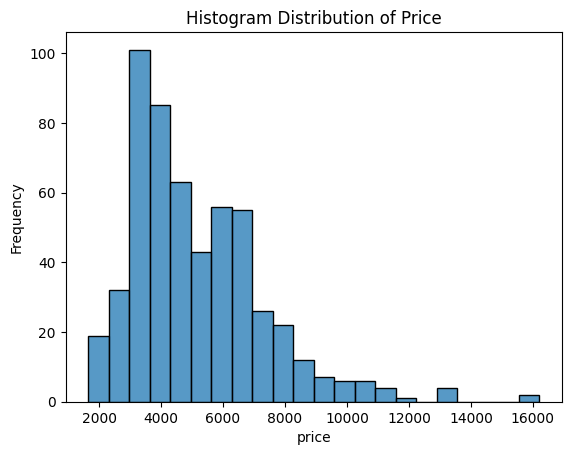

In [17]:

sns.histplot(df['area'][df['price'] < 13300000])

plt.title('Histogram Distribution of Price')
plt.xlabel('price')
plt.ylabel('Frequency')

plt.show()

In [18]:
## log transformation 
log_price = np.log1p(df['price'])

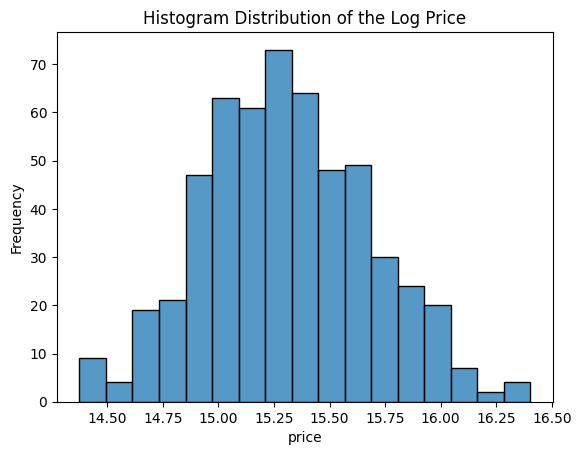

In [19]:
sns.histplot(log_price)

plt.title('Histogram Distribution of the Log Price')
plt.xlabel('price')
plt.ylabel('Frequency')

plt.show()

## Building A Validation Framework / Splitting Dataset
- Training set 60 %
- Validation dataset 20%
- Test dataset 20%


In [20]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11) 

print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')


Train set 327
Valid set 109
Test set 109


In [21]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
333,3920000,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished
306,4165000,4840,3,1,2,yes,no,no,no,no,1,no,semi-furnished
134,5803000,7000,3,1,1,yes,no,yes,no,no,2,yes,semi-furnished
300,4200000,4079,3,1,3,yes,no,no,no,no,0,no,semi-furnished
228,4690000,3630,3,1,2,yes,no,no,no,no,2,no,semi-furnished


In [22]:
## selecting target column and converting it to a vector format
y_train = df_train['price'].values
y_valid = df_valid['price'].values
y_test = df_test['price'].values
y_train_full = df_train_full['price'].values

In [23]:
#y_train

In [24]:
del df_train['price']
del df_valid['price']
del df_test['price']
del df_train_full['price']

## Train A Baseline Regression Model
- Selecting baseline features
- Train a regression model

In [25]:
baseline_features = ['area', 'bathrooms', 'bedrooms', 'stories']

df_train_bl = df_train[baseline_features]

In [26]:
X_train_bl = df_train_bl.values
X_train_bl

array([[3000,    1,    3,    2],
       [4840,    1,    3,    2],
       [7000,    1,    3,    1],
       ...,
       [7000,    1,    3,    2],
       [3650,    2,    3,    2],
       [8875,    1,    3,    1]])

In [27]:
df_train.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [28]:
## lets train model 
model = LinearRegression() 
model.fit(X_train_bl, y_train)


LinearRegression()

## Model Evaluation
- Generate the validation predictions
- Compare the validation predictions to the actual predictions
- Return an accuracy score
  

In [29]:
## generate validation baseline features
df_valid_bl = df_valid[baseline_features]

## convert dataframe into numpy array
X_valid_bl = df_valid_bl.values

In [30]:
X_valid_bl

array([[ 3185,     1,     2,     1],
       [ 6600,     2,     4,     1],
       [ 5500,     1,     4,     2],
       [ 4160,     1,     3,     3],
       [ 3500,     2,     4,     2],
       [ 2610,     3,     4,     2],
       [ 3000,     1,     2,     2],
       [ 7231,     1,     3,     2],
       [ 5020,     1,     3,     4],
       [ 5680,     1,     3,     2],
       [ 4130,     2,     3,     2],
       [ 3750,     1,     3,     1],
       [ 7085,     1,     3,     1],
       [ 4500,     1,     3,     4],
       [ 7420,     2,     4,     3],
       [ 2400,     1,     3,     2],
       [ 6325,     1,     3,     4],
       [ 6000,     2,     3,     3],
       [ 3360,     1,     2,     1],
       [ 4000,     1,     3,     2],
       [ 4000,     2,     3,     2],
       [ 4320,     1,     3,     1],
       [ 4040,     1,     2,     2],
       [ 4510,     1,     4,     2],
       [ 5880,     1,     2,     1],
       [ 6540,     1,     3,     1],
       [ 5320,     1,     2,     1],
 

## generate our validation prediction

In [31]:
y_valid_pred = model.predict(X_valid_bl)

In [32]:
acc_score = model.score(X_valid_bl, y_valid)

In [33]:
print(f'Baseline Validation Accuracy: {acc_score}')

Baseline Validation Accuracy: 0.5079501815631822


In [34]:
#y_valid_pred

In [35]:
rmse = root_mean_squared_error(y_valid_pred, y_valid)

In [36]:
print(f'Mean Accurace for the Model: {rmse}')

Mean Accurace for the Model: 1340033.6447905342


## Training Final Model
- df_train_full, df_text

In [37]:
df_train_final = df_train_full[baseline_features]

X_train_full = df_train_final.values



In [38]:
df_test_final = df_test[baseline_features]

X_test = df_test_final.values

In [39]:
final_model = LinearRegression()

final_model.fit(X_train_full, y_train_full)

LinearRegression()

In [40]:
y_test_predict = final_model.predict(X_test)


In [41]:
rmse = root_mean_squared_error(y_test, y_test_predict)

print(f'Final Model Accurace: {rmse}')

Final Model Accurace: 1260676.726069721
